In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('I:/Aasha/Data Science/data sets/OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [8]:
df=df.drop_duplicates()

In [9]:
# Checking null values

In [10]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
#converting cutsomerid fro contd. to catg. to perform clustering
df.CustomerID=df.CustomerID.astype(str)

In [13]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID      object
Country         object
dtype: object

In [14]:
import datetime as dt
import seaborn as sns

from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot as plt

Text(0, 0.5, '%Orders')

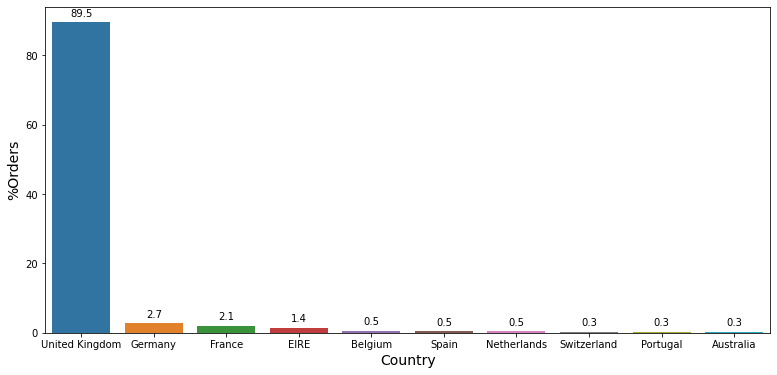

In [15]:
from matplotlib import pyplot as plt


temp = df.groupby(['Country'],as_index=False).agg({'InvoiceNo':'nunique'}).rename(columns = {'InvoiceNo':'Orders'})
total = temp['Orders'].sum(axis=0)
temp['%Orders'] = round((temp['Orders']/total)*100,4)

temp.sort_values(by=['%Orders'],ascending=False,inplace=True)
temp.reset_index(drop=True,inplace=True)

plt.figure(figsize=(13,6))
splot=sns.barplot(x="Country",y="%Orders",data=temp[:10])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Country", size=14)
plt.ylabel("%Orders", size=14)

In [16]:
#Checking the total number of products, transactions and customers.


pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3684,22190,4372


In [17]:
df.Country.value_counts().reset_index().head(20)


,index,Country
0,United Kingdom,356728
1,Germany,9480
2,France,8475
3,EIRE,7475
4,Spain,2528
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1471
9,Australia,1258


In [18]:
df['CustomerID'].unique().shape

(4372,)

In [19]:
#Remove transactions having missing values for the Customer ID field

df=df[~(df.CustomerID.isnull())]
print(df.shape)
df.head()

(401604, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [69]:
#cancelled orders

invoices = df['InvoiceNo']
x = invoices.str.contains('C', regex=True)
x.fillna(0, inplace=True)
x = x.astype(int)
x.value_counts()

df['order_canceled'] = x
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,TimeDiff,order_canceled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00,0


In [70]:
x.value_counts()

0    392692
Name: InvoiceNo, dtype: int64

In [20]:
#recency- how recent the has the customer come 
#frequency- how fast
#monetary- how much

In [21]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [22]:
#Remove negative or return transactions

df=df[~(df['Amount']<0)]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [23]:
df['Amount'].describe()

count    392732.000000
mean         22.629195
std         311.083465
min           0.000000
25%           4.950000
50%          12.390000
75%          19.800000
max      168469.600000
Name: Amount, dtype: float64

In [24]:
df[df['Amount']==0].shape

(40, 9)

In [25]:
#removing customers with 0 amount in transactions

df= df[df['Amount']!=0]

In [26]:
df[df['Amount']==0].groupby('CustomerID').agg({'InvoiceNo': 'count'})

,InvoiceNo
CustomerID,


In [27]:
rfm_m=df.groupby('CustomerID')['Amount'].sum()
rfm_m=rfm_m.reset_index()

In [28]:
rfm_f=df.groupby('CustomerID')['InvoiceNo'].count()
rfm_f.reset_index()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


In [29]:
rfm_f

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    721
18287.0     70
Name: InvoiceNo, Length: 4338, dtype: int64

In [30]:
rfm=pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')

In [31]:
rfm

,CustomerID,Amount,InvoiceNo
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4333,18280.0,180.60,10
4334,18281.0,80.82,7
4335,18282.0,178.05,12
4336,18283.0,2045.53,721


In [32]:
df.InvoiceDate= pd.to_datetime(df.InvoiceDate, format= '%m/%d/%Y %H:%M')
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Amount                float64
dtype: object

In [33]:
today= max(df.InvoiceDate)
today

df['TimeDiff']= today-df.InvoiceDate

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,TimeDiff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [34]:
rfm_r = df.groupby('CustomerID')['TimeDiff'].min().reset_index()
rfm_r

,CustomerID,TimeDiff
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4333,18280.0,277 days 02:58:00
4334,18281.0,180 days 01:57:00
4335,18282.0,7 days 01:07:00
4336,18283.0,3 days 00:48:00


In [35]:
import datetime as dt

rfm_r['TimeDiff'] = rfm_r['TimeDiff'].dt.days
rfm_r

rfm=pd.merge(rfm, rfm_r, on='CustomerID', how='inner')
rfm

,CustomerID,Amount,InvoiceNo,TimeDiff
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4333,18280.0,180.60,10,277
4334,18281.0,80.82,7,180
4335,18282.0,178.05,12,7
4336,18283.0,2045.53,721,3


In [36]:
rfm.columns=['CustomerID','Monetary','Frequency', 'Recency']

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

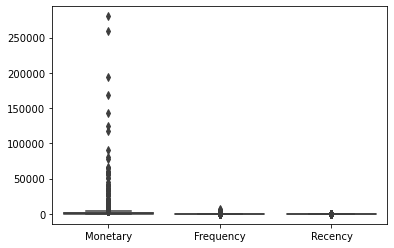

In [38]:
sns.boxplot(data=rfm[['Monetary', 'Frequency','Recency']])

In [39]:
Q1 = rfm.Monetary.quantile(0.25)
Q3 = rfm.Monetary.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.Monetary >= Q1 - 1.5*IQR) & (rfm.Monetary <= Q3 + 1.5*IQR)]

Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3-Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

In [40]:
rfm

,CustomerID,Monetary,Frequency,Recency
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,2506.04,85,35
6,12353.0,89.00,4,203
...,...,...,...,...
4332,18278.0,173.90,9,73
4333,18280.0,180.60,10,277
4334,18281.0,80.82,7,180
4335,18282.0,178.05,12,7


In [41]:
rfm2= rfm[['Monetary', 'Frequency', 'Recency']]

In [42]:
rfm2

,Monetary,Frequency,Recency
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309
5,2506.04,85,35
6,89.00,4,203
...,...,...,...
4332,173.90,9,73
4333,180.60,10,277
4334,80.82,7,180
4335,178.05,12,7


In [43]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
rfmscaled=s.fit_transform(rfm2)
rfmscaled=pd.DataFrame(rfmscaled)
rfmscaled


,0,1,2
0,1.334197,-0.362692,-0.288862
1,1.281271,0.681160,-0.833458
2,-0.616447,-0.710642,1.996499
3,2.279355,0.979403,-0.668134
4,-0.943679,-1.033739,0.965656
...,...,...,...
3657,-0.830468,-0.909471,-0.298586
3658,-0.821534,-0.884617,1.685301
3659,-0.954587,-0.959178,0.741982
3660,-0.824934,-0.834910,-0.940432


In [44]:
rfmscaled.columns=[['Monetary','Frequency','Rececny']]

In [45]:
rfmscaled

,Monetary,Frequency,Rececny
0,1.334197,-0.362692,-0.288862
1,1.281271,0.681160,-0.833458
2,-0.616447,-0.710642,1.996499
3,2.279355,0.979403,-0.668134
4,-0.943679,-1.033739,0.965656
...,...,...,...
3657,-0.830468,-0.909471,-0.298586
3658,-0.821534,-0.884617,1.685301
3659,-0.954587,-0.959178,0.741982
3660,-0.824934,-0.834910,-0.940432


In [47]:
from sklearn.cluster import KMeans

li= []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(rfmscaled)
    li.append(kmeans.inertia_)

C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Sures

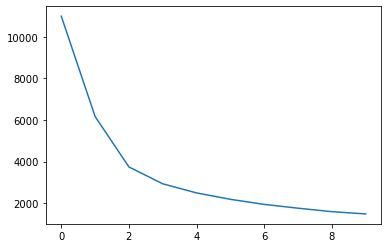

In [48]:
plt.plot(li)

In [49]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(rfmscaled)

C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=3)

In [50]:
kmeans.labels_

array([1, 0, 2, ..., 2, 1, 0])

In [51]:
rfm['ClusterID']=kmeans.labels_

In [52]:
rfm

,CustomerID,Monetary,Frequency,Recency,ClusterID
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,2506.04,85,35,0
6,12353.0,89.00,4,203,2
...,...,...,...,...,...
4332,18278.0,173.90,9,73,1
4333,18280.0,180.60,10,277,2
4334,18281.0,80.82,7,180,2
4335,18282.0,178.05,12,7,1


C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Aasha Sures

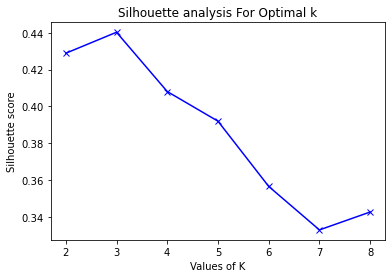

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(rfmscaled)
    cluster_labels = kmeans.labels_
 # silhouette score
    silhouette_avg.append(silhouette_score(rfmscaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()



<AxesSubplot:xlabel='ClusterID', ylabel='Monetary'>

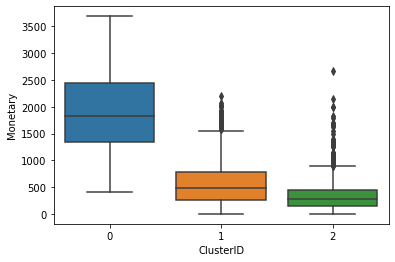

In [54]:
sns.boxplot(x='ClusterID',y='Monetary',data=rfm)

#0 group cust are highly paying customers

<AxesSubplot:xlabel='ClusterID', ylabel='Frequency'>

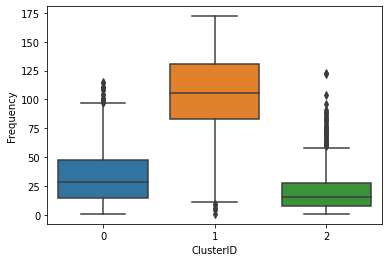

In [53]:
sns.boxplot(x='ClusterID',y='Frequency',data=rfm)

#0 group customrs are more frequenct

<AxesSubplot:xlabel='ClusterID', ylabel='Recency'>

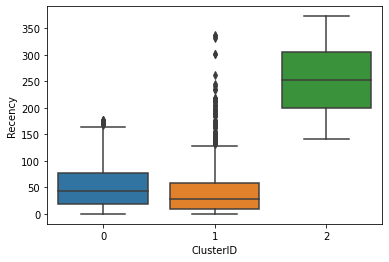

In [54]:
sns.boxplot(x='ClusterID',y='Recency',data=rfm)

#2 group customrs are more recent

In [55]:
kmeans = KMeans(n_clusters=3, random_state=1)

# Compute k-means clustering on pre-processed data
kmeans.fit(rfmscaled)

# Extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_

# Create a cluster label column in the original DataFrame
data_norm_k3 = rfmscaled.assign(Cluster = cluster_labels)
data_k3 = rfm.assign(Cluster = cluster_labels)

# Calculate average RFM values and size for each cluster
summary_k3 = data_k3.groupby(['Cluster']).agg({'Recency': 'mean',
                                                    'Frequency': 'mean',
                                                    'Monetary': ['mean', 'count'],}).round(0)

summary_k3

C:\Users\Aasha Suresh\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          55.0      25.0    460.0  1539
1          40.0     113.0   2511.0   379
2         258.0      21.0    359.0   921
3          50.0      81.0   1126.0   823